In [51]:
import numpy as np
import cmath
from scipy import signal
import matplotlib.pyplot as plt

Ganancia de un sistema sobre el plano complejo

In [52]:
# Geneando plano complejo
exten = 2.7
r = np.linspace(-exten,exten,200)
i = np.linspace(-exten,exten,200)
R,I = np.meshgrid(r,i)

z = np.zeros(np.shape(R),dtype=complex)
z2 = np.zeros(np.shape(R),dtype=complex)
for k in range(0,len(r)):
    for j in range(0,len(i)):
        z[k][j] = complex(R[k][j], I[k][j])
        z2[k][j] = z[k][j]**2

In [53]:
#Coeficientes de la ecuación en diferencias
b0 = 0.5
b1 = 0.1
b2 = 0.0
a1 = -0.1
a2 = 0.2

In [54]:
# Función de transferencia y ganancia en el plano complejo
num = b0*z2 + b1*z + b2
den = z2 - a1*z -a2
Hz = np.divide(num,den)
G =abs(Hz)

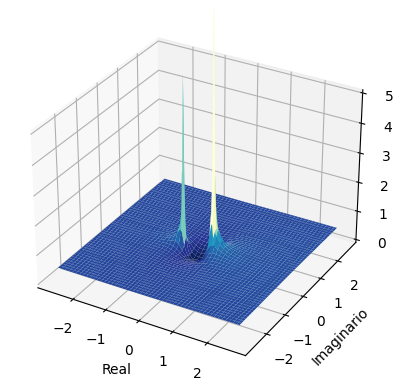

In [60]:
#Grafica 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(R, I, G, cmap=plt.cm.YlGnBu_r)
ax.set_zlim(0, 5)
ax.set_xlabel('Real')
ax.set_ylabel('Imaginario')
ax.set_zlabel('G')
plt.show()

Localización de polos y ceros del sistema

In [56]:
sys_z = signal.dlti([b0, b1, b2],[1, -a1, -a2])
print('Ceros del sistema:')
ceros = sys_z.zeros
print(ceros)
print('Polos del sistema:')
polos = sys_z.poles
print(polos)

Ceros del sistema:
[-0.2  0. ]
Polos del sistema:
[-0.5  0.4]


In [57]:
def circulo(x,y,r):
    ang = np.arange(0,2*np.pi,0.01)
    xp = r*np.cos(ang)
    yp = r*np.sin(ang)
    plt.plot(x+xp,y+yp,color = 'green')

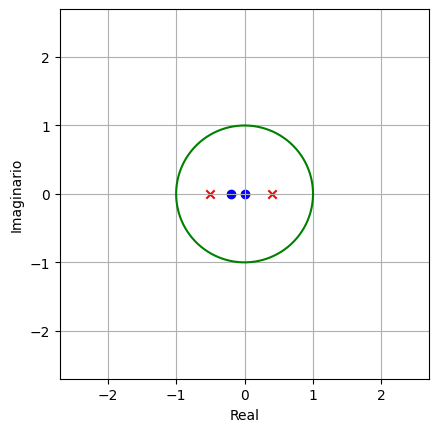

In [58]:
plt.figure(2)
plt.xlim(-exten, exten)
plt.ylim(-exten, exten)
plt.xlabel('Real')
plt.ylabel('Imaginario')
circulo(0,0,1)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')

for c in range(0,len(ceros)):
    plt.scatter(ceros[c].real,ceros[c].imag,marker='o',color='blue')

for p in range(0,len(polos)):
    plt.scatter(polos[p].real,polos[p].imag,marker='x',color='red')

plt.show()
